In [78]:
from datetime import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from numpy import size
import pandas as pd
import seaborn as sns
from fpdf import FPDF, HTMLMixin
import json
# from pymongo import MongoClient

In [83]:
f = open('/home/arthur/Downloads/Telegram Desktop/ads')
ads_json = json.load(f)
df = pd.json_normalize(ads_json, max_level=0)

In [84]:
df

,_id,id_user,id_book,type_ad,createdAt,updatedAt,__v,price,id_user_buy
0,{'$oid': '6373ce769f13987b2ee1bbd2'},{'$oid': '63729f16011783b55d9423f5'},{'$oid': '6369bfa9b6dd7079da53602e'},troca,{'$date': {'$numberLong': '1668533878643'}},{'$date': {'$numberLong': '1668533878643'}},0,NaN,NaN
1,{'$oid': '6373ce769f13987b2ee1bbd8'},{'$oid': '63729f17011783b55d942401'},{'$oid': '6369bf9ab6dd7079da535fa9'},venda,{'$date': {'$numberLong': '1668533878761'}},{'$date': {'$numberLong': '1668533878761'}},0,12.5,NaN
2,{'$oid': '6373ce769f13987b2ee1bbda'},{'$oid': '63729f17011783b55d942409'},{'$oid': '6369c010b6dd7079da53634e'},venda,{'$date': {'$numberLong': '1668533878776'}},{'$date': {'$numberLong': '1668533878776'}},0,25.2,{'$oid': '63729f17011783b55d942469'}
3,{'$oid': '6373ce769f13987b2ee1bbdc'},{'$oid': '63729f17011783b55d942411'},{'$oid': '6369c02cb6dd7079da53646a'},venda,{'$date': {'$numberLong': '1668533878785'}},{'$date': {'$numberLong': '1668533878785'}},0,60,NaN
4,{'$oid': '6373ce769f13987b2ee1bbde'},{'$oid': '63729f17011783b55d942419'},{'$oid': '6369c217b6dd7079da5369af'},venda,{'$date': {'$numberLong': '1668533878813'}},{'$date': {'$numberLong': '1668533878813'}},0,18.1,{'$oid': '63729f17011783b55d942481'}
...,...,...,...,...,...,...,...,...,...
117,{'$oid': '6373ce779f13987b2ee1bcc0'},{'$oid': '63729f18011783b55d942521'},{'$oid': '63686ffc324a004df4f64e58'},venda,{'$date': {'$numberLong': '1668533879472'}},{'$date': {'$numberLong': '1668533879472'}},0,45.6,{'$oid': '63729f17011783b55d9424bb'}
118,{'$oid': '6373ce779f13987b2ee1bcc2'},{'$oid': '63729f18011783b55d942571'},{'$oid': '6369bfe5b6dd7079da5361f3'},troca,{'$date': {'$numberLong': '1668533879498'}},{'$date': {'$numberLong': '1668533879498'}},0,NaN,NaN
119,{'$oid': '6373ce779f13987b2ee1bcc4'},{'$oid': '63729f17011783b55d942463'},{'$oid': '63686da8324a004df4f64ce8'},troca,{'$date': {'$numberLong': '1668533879513'}},{'$date': {'$numberLong': '1668533879513'}},0,NaN,NaN
120,{'$oid': '6373ce779f13987b2ee1bcc6'},{'$oid': '63729f17011783b55d94243b'},{'$oid': '6369c094b6dd7079da5366f0'},troca,{'$date': {'$numberLong': '1668533879520'}},{'$date': {'$numberLong': '1668533879520'}},0,NaN,NaN


In [85]:
id_lists = ['_id', 'id_user', 'id_book', 'id_user_buy']

for col in id_lists:
    for ind,x in enumerate(df[col]):
        if isinstance(x,dict):
            df.at[ind,col] = x['$oid']


In [89]:
df

,_id,id_user,id_book,type_ad,createdAt,updatedAt,__v,price,id_user_buy
0,6373ce769f13987b2ee1bbd2,63729f16011783b55d9423f5,6369bfa9b6dd7079da53602e,troca,{'$date': {'$numberLong': '1668533878643'}},{'$date': {'$numberLong': '1668533878643'}},0,NaN,NaN
1,6373ce769f13987b2ee1bbd8,63729f17011783b55d942401,6369bf9ab6dd7079da535fa9,venda,{'$date': {'$numberLong': '1668533878761'}},{'$date': {'$numberLong': '1668533878761'}},0,12.5,NaN
2,6373ce769f13987b2ee1bbda,63729f17011783b55d942409,6369c010b6dd7079da53634e,venda,{'$date': {'$numberLong': '1668533878776'}},{'$date': {'$numberLong': '1668533878776'}},0,25.2,63729f17011783b55d942469
3,6373ce769f13987b2ee1bbdc,63729f17011783b55d942411,6369c02cb6dd7079da53646a,venda,{'$date': {'$numberLong': '1668533878785'}},{'$date': {'$numberLong': '1668533878785'}},0,60,NaN
4,6373ce769f13987b2ee1bbde,63729f17011783b55d942419,6369c217b6dd7079da5369af,venda,{'$date': {'$numberLong': '1668533878813'}},{'$date': {'$numberLong': '1668533878813'}},0,18.1,63729f17011783b55d942481
...,...,...,...,...,...,...,...,...,...
117,6373ce779f13987b2ee1bcc0,63729f18011783b55d942521,63686ffc324a004df4f64e58,venda,{'$date': {'$numberLong': '1668533879472'}},{'$date': {'$numberLong': '1668533879472'}},0,45.6,63729f17011783b55d9424bb
118,6373ce779f13987b2ee1bcc2,63729f18011783b55d942571,6369bfe5b6dd7079da5361f3,troca,{'$date': {'$numberLong': '1668533879498'}},{'$date': {'$numberLong': '1668533879498'}},0,NaN,NaN
119,6373ce779f13987b2ee1bcc4,63729f17011783b55d942463,63686da8324a004df4f64ce8,troca,{'$date': {'$numberLong': '1668533879513'}},{'$date': {'$numberLong': '1668533879513'}},0,NaN,NaN
120,6373ce779f13987b2ee1bcc6,63729f17011783b55d94243b,6369c094b6dd7079da5366f0,troca,{'$date': {'$numberLong': '1668533879520'}},{'$date': {'$numberLong': '1668533879520'}},0,NaN,NaN


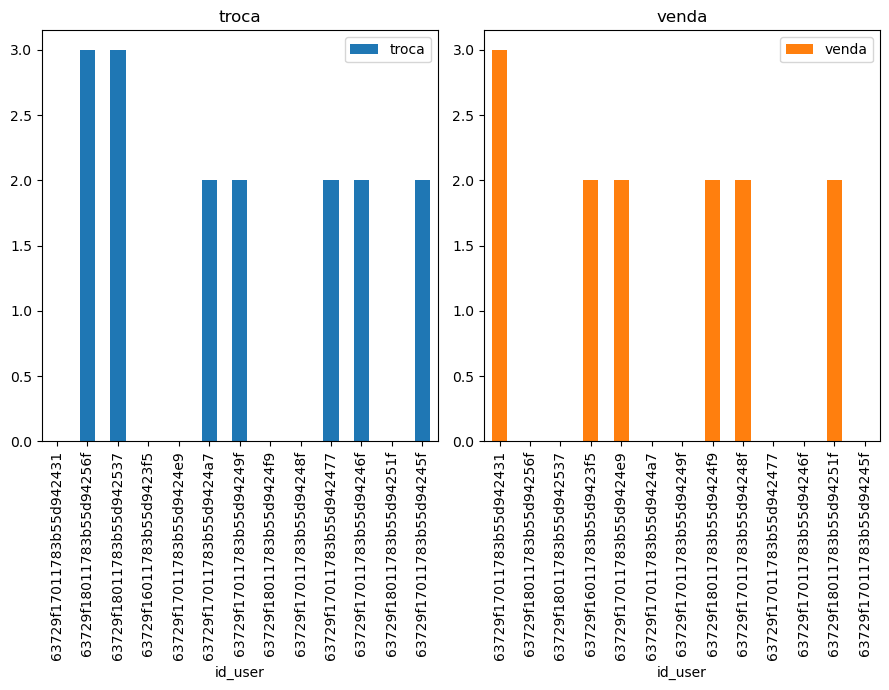

In [129]:
maiores_anunciadores = df.groupby('id_user')['type_ad'].value_counts().sort_values(ascending=False).head(13)
ax = maiores_anunciadores.unstack(level=1).plot(kind='bar',figsize=(9, 7), subplots=True,layout=(1,2))
plt.tight_layout()
# maiores_anunciadores.plot(X='id_user', Y=('type_ad','troca'))
# fig, ax = plt.subplots(figsize=(10,8))
# plt.suptitle('')
# maiores_anunciadores.boxplot(column=['SepalLength'], by='Name', ax=ax)

In [118]:
df

,_id,id_user,id_book,type_ad,createdAt,updatedAt,__v,price,id_user_buy
0,6373ce769f13987b2ee1bbd2,63729f16011783b55d9423f5,6369bfa9b6dd7079da53602e,troca,{'$date': {'$numberLong': '1668533878643'}},{'$date': {'$numberLong': '1668533878643'}},0,NaN,NaN
1,6373ce769f13987b2ee1bbd8,63729f17011783b55d942401,6369bf9ab6dd7079da535fa9,venda,{'$date': {'$numberLong': '1668533878761'}},{'$date': {'$numberLong': '1668533878761'}},0,12.5,NaN
2,6373ce769f13987b2ee1bbda,63729f17011783b55d942409,6369c010b6dd7079da53634e,venda,{'$date': {'$numberLong': '1668533878776'}},{'$date': {'$numberLong': '1668533878776'}},0,25.2,63729f17011783b55d942469
3,6373ce769f13987b2ee1bbdc,63729f17011783b55d942411,6369c02cb6dd7079da53646a,venda,{'$date': {'$numberLong': '1668533878785'}},{'$date': {'$numberLong': '1668533878785'}},0,60,NaN
4,6373ce769f13987b2ee1bbde,63729f17011783b55d942419,6369c217b6dd7079da5369af,venda,{'$date': {'$numberLong': '1668533878813'}},{'$date': {'$numberLong': '1668533878813'}},0,18.1,63729f17011783b55d942481
...,...,...,...,...,...,...,...,...,...
117,6373ce779f13987b2ee1bcc0,63729f18011783b55d942521,63686ffc324a004df4f64e58,venda,{'$date': {'$numberLong': '1668533879472'}},{'$date': {'$numberLong': '1668533879472'}},0,45.6,63729f17011783b55d9424bb
118,6373ce779f13987b2ee1bcc2,63729f18011783b55d942571,6369bfe5b6dd7079da5361f3,troca,{'$date': {'$numberLong': '1668533879498'}},{'$date': {'$numberLong': '1668533879498'}},0,NaN,NaN
119,6373ce779f13987b2ee1bcc4,63729f17011783b55d942463,63686da8324a004df4f64ce8,troca,{'$date': {'$numberLong': '1668533879513'}},{'$date': {'$numberLong': '1668533879513'}},0,NaN,NaN
120,6373ce779f13987b2ee1bcc6,63729f17011783b55d94243b,6369c094b6dd7079da5366f0,troca,{'$date': {'$numberLong': '1668533879520'}},{'$date': {'$numberLong': '1668533879520'}},0,NaN,NaN


In [127]:
mais_caros = df.groupby(['id_user','type_ad'])['price'].apply(lambda x: x.sort_values().rank(method="dense"))

id_user                   type_ad     
63729f16011783b55d9423f5  troca    0      NaN
                          venda    67     1.0
                                   83     2.0
63729f17011783b55d942401  troca    49     NaN
                          venda    1      1.0
                                         ... 
63729f18011783b55d94256f  troca    54     NaN
                                   95     NaN
63729f18011783b55d942571  troca    118    NaN
63729f18011783b55d942577  troca    46     NaN
                          venda    80     1.0
Name: price, Length: 122, dtype: float64

In [ ]:
df['rank']= df.sort_values(by=['id_user', ])